In [26]:
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM, SimpleRNN, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
dataset = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [28]:
print(f"X_train.shape : {X_train.shape}")

X_train.shape : (60000, 28, 28)


In [29]:
X_train, X_test = X_train / 255.0 , X_test/255.0

In [30]:
X_train[0].shape

(28, 28)

In [34]:
# build a model
i = Input(shape=X_train[0].shape) # T x D
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               80384     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [36]:
r = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3453 - accuracy: 0.8891 - val_loss: 0.1321 - val_accuracy: 0.9607
Epoch 2/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1012 - accuracy: 0.9692 - val_loss: 0.0888 - val_accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0694 - accuracy: 0.9798 - val_loss: 0.0643 - val_accuracy: 0.9805
Epoch 4/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0610 - val_accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 6/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0441 -

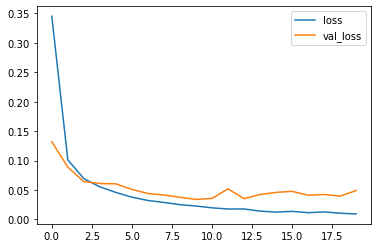

In [41]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

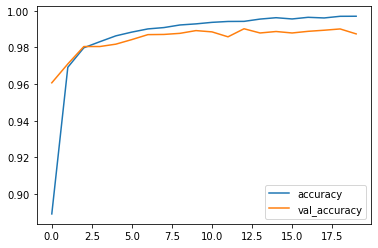

In [42]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[ 976    0    0    1    0    0    1    1    1    0]
 [   0 1131    0    1    0    1    2    0    0    0]
 [   2    0 1022    1    1    0    0    4    1    1]
 [   0    0    4  999    0    1    0    1    5    0]
 [   0    0    0    0  969    0    2    1    1    9]
 [   1    0    1   16    0  863    4    1    4    2]
 [   1    2    0    0    2    0  951    0    2    0]
 [   0   13    4    2    0    0    0 1003    1    5]
 [   1    1    2    0    1    2    2    1  963    1]
 [   1    0    0    1    2    4    0    3    1  997]]


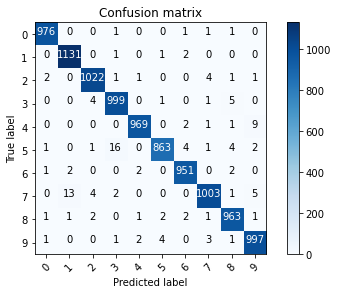

In [45]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [47]:
misclassified_idx = np.where(p_test != y_test)[0]
len(misclassified_idx)

126

Text(0.5, 1.0, 'True label: 8, Predicted: 6')

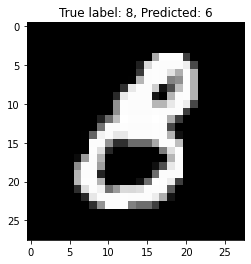

In [55]:
idx = np.random.choice(misclassified_idx)
plt.imshow(X_test[idx], cmap='gray')
plt.title(f"True label: {y_test[idx]}, Predicted: {p_test[idx]}")